In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST
model = torch.nn.Linear(28*28,10)
loss_fn = torch.nn.functional.cross_entropy
opt = torch.optim.SGD(model.parameters(), 0.001)

In [4]:
dataset = MNIST(root = 'data/', train = True, download = True)
# Dataset is the list or iterable object having tuples and each tuple has pixel and label

In [3]:
test_dataset = MNIST(root = 'data/', train = False)

In [4]:
# Converting data into tensor
import torchvision.transforms as transforms
dataset = MNIST(root = 'data/', train = True, download = True, transform = transforms.ToTensor() )

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [7]:
# Splitting the data into training and validation sets
from torch.utils.data import random_split
train_data, val_data = random_split(dataset, [50000, 10000])

AttributeError: 'Subset' object has no attribute 'size'

In [6]:
# Converting data into batches for training and validation
from torch.utils.data import DataLoader
batch_size = 100
train_loader = DataLoader(train_data,batch_size, shuffle = True)
# Shuffle set to true to get different batch of data every epoch
val_loader = DataLoader(val_data, batch_size)

In [7]:
# import torch.nn
# input_size = 28*28
# num_classes = 10
# class MnistModel(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = torch.nn.Linear(input_size, num_classes)
    
#     def forward(self, xb):
#         xb = xb.reshape(-1, 784)
#         out = self.linear(xb)
#         return out

# model = MnistModel()

In [17]:
import torch.nn
import torch.optim
import torch.nn.functional


def fit(epochs):

    dl = {}
    da = {}

    for epoch in range(5):

        l = []
        a = []

        for image, labels in train_loader:
            # Predicted 
            pred = model(image.reshape(-1,784))
#             print(pred.shape)
#             print(labels.shape)
#             print(pred[3])
#             print(torch.nn.functional.softmax(pred[3]))
#             print(labels[3])
            # loss calculation
            loss = loss_fn(pred, labels)
            # Gradient calculation
            loss.backward()
            # Weight adjusting
            opt.step()
            # Setting gradient to zero
            opt.zero_grad()
            break

        for image, labels in val_loader:
            # Predicted
            pred = model(image.reshape(-1,784))
            # loss calculation
            loss = loss_fn(pred, labels)
            # accuracy calulation
            _, pred = torch.max(pred, dim = 1)
            acc = (torch.sum(pred == labels).item()/len(pred))

            l.append(loss)
            a.append(acc)


        dl[epoch+1] = sum(l)/len(l)
        da[epoch+1] = sum(a)/len(a)

#         print('Epoch loss : ', torch.stack(l).mean())
#         print('Epoch accu : ', torch.stack(a).mean())
#         print(dl)
        print(da)

    return da
        

In [18]:
da1 = fit(5)

torch.Size([100, 10])
torch.Size([100])
tensor([ 0.1735, -0.0443, -0.4107,  0.0774,  0.1146, -0.0288,  0.0583, -0.2257,
        -0.2501, -0.2933], grad_fn=<SelectBackward0>)
tensor([0.1270, 0.1021, 0.0708, 0.1154, 0.1197, 0.1037, 0.1132, 0.0852, 0.0832,
        0.0796], grad_fn=<SoftmaxBackward0>)
tensor(5)


C:\Users\RuturajMane\AppData\Local\Temp\ipykernel_3788\4094637638.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.nn.functional.softmax(pred[3]))


{1: 0.09099999999999996}
torch.Size([100, 10])
torch.Size([100])
tensor([ 0.0154, -0.2422, -0.1200, -0.3808,  0.0101,  0.0746, -0.0088, -0.5384,
         0.0985, -0.0865], grad_fn=<SelectBackward0>)
tensor([0.1122, 0.0867, 0.0980, 0.0755, 0.1116, 0.1190, 0.1095, 0.0645, 0.1219,
        0.1013], grad_fn=<SoftmaxBackward0>)
tensor(2)
{1: 0.09099999999999996, 2: 0.09179999999999999}
torch.Size([100, 10])
torch.Size([100])
tensor([-0.3242, -0.0696,  0.1690, -0.0400, -0.0175,  0.3550,  0.1431, -0.3279,
        -0.0616,  0.1849], grad_fn=<SelectBackward0>)
tensor([0.0707, 0.0912, 0.1158, 0.0939, 0.0961, 0.1395, 0.1128, 0.0704, 0.0919,
        0.1176], grad_fn=<SoftmaxBackward0>)
tensor(2)
{1: 0.09099999999999996, 2: 0.09179999999999999, 3: 0.0935}
torch.Size([100, 10])
torch.Size([100])
tensor([-0.0950,  0.0078,  0.0095,  0.2901, -0.0288,  0.1522,  0.1608,  0.0518,
        -0.1665, -0.1921], grad_fn=<SelectBackward0>)
tensor([0.0883, 0.0979, 0.0980, 0.1298, 0.0943, 0.1131, 0.1140, 0.1023, 0.

In [144]:
da2 = fit(5)

{1: 0.8425999999999996}
{1: 0.8425999999999996, 2: 0.8461999999999995}
{1: 0.8425999999999996, 2: 0.8461999999999995, 3: 0.8490999999999996}
{1: 0.8425999999999996, 2: 0.8461999999999995, 3: 0.8490999999999996, 4: 0.8512}
{1: 0.8425999999999996, 2: 0.8461999999999995, 3: 0.8490999999999996, 4: 0.8512, 5: 0.8519}


In [145]:
da3 = fit(5)


{1: 0.8536}
{1: 0.8536, 2: 0.8554999999999997}
{1: 0.8536, 2: 0.8554999999999997, 3: 0.8572}
{1: 0.8536, 2: 0.8554999999999997, 3: 0.8572, 4: 0.8579000000000001}
{1: 0.8536, 2: 0.8554999999999997, 3: 0.8572, 4: 0.8579000000000001, 5: 0.8591000000000002}


In [148]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())
len(test_dataset)
j=0
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    pred = model(image.reshape(-1,784))
    _, pred = torch.max(pred, dim = 1)
#     print(pred)
#     print(label)
    if pred == label:
        j+=1
print(j/len(test_dataset))

0.8708


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [0.8227, 0.829, 0.8347999999999997, 0.8378999999999996, 0.8398999999999996, 0.8425999999999996, 0.8461999999999995, 0.8490999999999996, 0.8512, 0.8519, 0.8536, 0.8554999999999997, 0.8572, 0.8579000000000001, 0.8591000000000002]


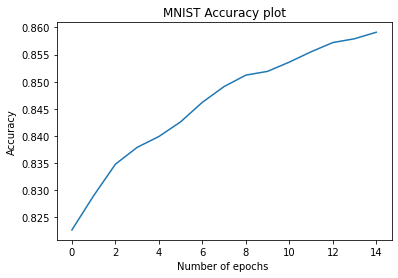

In [161]:
import matplotlib.pyplot 
import itertools
x = [i for i in range(15)]
y = []
for i in [da1,da2,da3]:
    y.append(list(i.values()))
y = list(itertools.chain(*y))
print(x,y)
matplotlib.pyplot.plot(x,y)
matplotlib.pyplot.xlabel('Number of epochs ')
matplotlib.pyplot.ylabel('Accuracy')
matplotlib.pyplot.title('MNIST Accuracy plot')
matplotlib.pyplot.show()


In [162]:
# Saving model the model
torch.save(model.state_dict(), 'mnist-logisti.pth')

In [163]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0169,  0.0146, -0.0226,  ..., -0.0054,  0.0041,  0.0235],
                      [-0.0188,  0.0290, -0.0327,  ..., -0.0188,  0.0218, -0.0172],
                      [-0.0265, -0.0182, -0.0156,  ...,  0.0152, -0.0016,  0.0339],
                      ...,
                      [ 0.0123, -0.0015,  0.0042,  ...,  0.0184, -0.0097,  0.0288],
                      [-0.0016, -0.0236, -0.0312,  ...,  0.0311, -0.0193, -0.0241],
                      [-0.0317,  0.0099, -0.0331,  ..., -0.0125,  0.0310, -0.0004]])),
             ('bias',
              tensor([-0.0538,  0.0944,  0.0016, -0.0286,  0.0157,  0.0529, -0.0254,  0.0258,
                      -0.1246,  0.0141]))])

In [164]:
model2 = torch.nn.Linear(28*28,10)

In [165]:
model2.state_dict()

OrderedDict([('weight',
              tensor([[-0.0210, -0.0219,  0.0290,  ...,  0.0286, -0.0166, -0.0313],
                      [ 0.0346,  0.0302,  0.0254,  ...,  0.0127, -0.0253,  0.0004],
                      [ 0.0041,  0.0016,  0.0305,  ..., -0.0317, -0.0001,  0.0004],
                      ...,
                      [ 0.0299,  0.0085,  0.0311,  ..., -0.0024, -0.0243,  0.0321],
                      [ 0.0017,  0.0281, -0.0126,  ..., -0.0297, -0.0171, -0.0058],
                      [-0.0170,  0.0103,  0.0343,  ..., -0.0241,  0.0163,  0.0124]])),
             ('bias',
              tensor([ 0.0177, -0.0189, -0.0331,  0.0153,  0.0174,  0.0125,  0.0158,  0.0192,
                       0.0022,  0.0215]))])

In [166]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())
len(test_dataset)
j=0
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    pred = model2(image.reshape(-1,784))
    _, pred = torch.max(pred, dim = 1)
#     print(pred)
#     print(label)
    if pred == label:
        j+=1
print(j/len(test_dataset))

0.13


In [167]:
model2.load_state_dict((torch.load('mnist-logisti.pth')))
model2.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0169,  0.0146, -0.0226,  ..., -0.0054,  0.0041,  0.0235],
                      [-0.0188,  0.0290, -0.0327,  ..., -0.0188,  0.0218, -0.0172],
                      [-0.0265, -0.0182, -0.0156,  ...,  0.0152, -0.0016,  0.0339],
                      ...,
                      [ 0.0123, -0.0015,  0.0042,  ...,  0.0184, -0.0097,  0.0288],
                      [-0.0016, -0.0236, -0.0312,  ...,  0.0311, -0.0193, -0.0241],
                      [-0.0317,  0.0099, -0.0331,  ..., -0.0125,  0.0310, -0.0004]])),
             ('bias',
              tensor([-0.0538,  0.0944,  0.0016, -0.0286,  0.0157,  0.0529, -0.0254,  0.0258,
                      -0.1246,  0.0141]))])

In [168]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())
len(test_dataset)
j=0
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    pred = model2(image.reshape(-1,784))
    _, pred = torch.max(pred, dim = 1)
#     print(pred)
#     print(label)
    if pred == label:
        j+=1
print(j/len(test_dataset))

0.8708
